In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from numpy.linalg import norm

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
x=np.linspace(0,21,50)
print(len(x))

50


In [3]:
a=-2
b=1
y=a*x+b
print(y)

[  1.           0.14285714  -0.71428571  -1.57142857  -2.42857143
  -3.28571429  -4.14285714  -5.          -5.85714286  -6.71428571
  -7.57142857  -8.42857143  -9.28571429 -10.14285714 -11.
 -11.85714286 -12.71428571 -13.57142857 -14.42857143 -15.28571429
 -16.14285714 -17.         -17.85714286 -18.71428571 -19.57142857
 -20.42857143 -21.28571429 -22.14285714 -23.         -23.85714286
 -24.71428571 -25.57142857 -26.42857143 -27.28571429 -28.14285714
 -29.         -29.85714286 -30.71428571 -31.57142857 -32.42857143
 -33.28571429 -34.14285714 -35.         -35.85714286 -36.71428571
 -37.57142857 -38.42857143 -39.28571429 -40.14285714 -41.        ]


#### Plot your data points. 

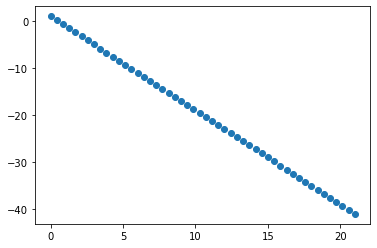

In [4]:
plt.scatter(x,y)

## Adagrad

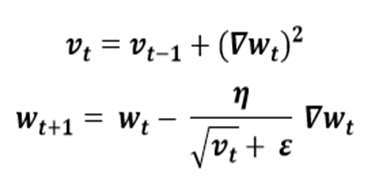

In [5]:
def adagrad(X,Y,learn_rate,max_iter):
    theta_0 , theta_1 , v_t_0 , v_t_1 = 0 , 0 , 0 , 0
    E = 1e-8
    cost_list = []
    theta_0_list = []
    theta_1_list = []
    predicted=[]
    counter = 0
    for i in range(max_iter): 
        # calculate h(theta)
        predicted_Y = theta_0 + theta_1 * X
        predicted.append(predicted_Y)
        # calculate cost function
        cost_fun = sum((predicted_Y - Y)**2) / (2*len(Y))
        cost_list.append(cost_fun)
        # calculate gradient
        grad_0 = sum(predicted_Y - Y) / len(Y)
        grad_1 = sum((predicted_Y - Y)* X) / len(Y) 
        grad = np.array([grad_0,grad_1])
        # calculate v_t
        v_t_0 = v_t_0 + (grad_0 ** 2)
        v_t_1 = v_t_1 + (grad_1 ** 2)
        # update thetas
        theta_0 = theta_0 - ((learn_rate / ((np.sqrt(v_t_0)) + E)) * grad_0)
        theta_1 = theta_1 - ((learn_rate / ((np.sqrt(v_t_1)) + E)) * grad_1)   
        theta_0_list.append(theta_0)
        theta_1_list.append(theta_1)
        counter += 1
        if len(cost_list) > 1 :
            if norm(grad) < 0.0001:
                break
            elif np.absolute(cost_list[i] - cost_list[i-1]) < 0.0001 :
                break
            elif np.absolute(norm([theta_0_list[i],theta_1_list[i]]) - norm([theta_0_list[i-1],theta_1_list[i-1]])) < 0.0001 :
                break
    return theta_0_list , theta_1_list , cost_list , predicted , theta_0_list[-1] , theta_1_list[-1] , counter

In [6]:
theta_0_list , theta_1_list , cost_list , predicted , optim_theta_0 , optim_theta_1 , counter = adagrad(x,y,0.2,1000)
hypo = optim_theta_0 + optim_theta_1 * x
print(hypo)

[ -1.60607631  -2.3708252   -3.1355741   -3.900323    -4.66507189
  -5.42982079  -6.19456969  -6.95931859  -7.72406748  -8.48881638
  -9.25356528 -10.01831417 -10.78306307 -11.54781197 -12.31256087
 -13.07730976 -13.84205866 -14.60680756 -15.37155645 -16.13630535
 -16.90105425 -17.66580315 -18.43055204 -19.19530094 -19.96004984
 -20.72479873 -21.48954763 -22.25429653 -23.01904543 -23.78379432
 -24.54854322 -25.31329212 -26.07804101 -26.84278991 -27.60753881
 -28.37228771 -29.1370366  -29.9017855  -30.6665344  -31.43128329
 -32.19603219 -32.96078109 -33.72552998 -34.49027888 -35.25502778
 -36.01977668 -36.78452557 -37.54927447 -38.31402337 -39.07877226]


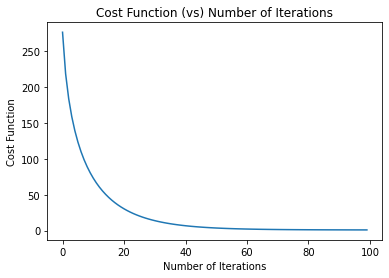

In [7]:
max_iter = list(range(counter))
plt.plot(max_iter,cost_list)
plt.xlabel("Number of Iterations")
plt.ylabel("Cost Function")
plt.title("Cost Function (vs) Number of Iterations")
plt.show()

In [8]:
print(counter)

100


In [9]:
r2_score(y,hypo)

0.9876143106339502

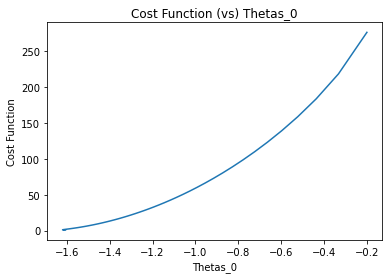

In [10]:
plt.plot(theta_0_list,cost_list)
plt.xlabel("Thetas_0")
plt.ylabel("Cost Function")
plt.title("Cost Function (vs) Thetas_0")
plt.show()

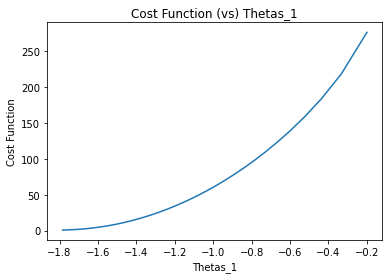

In [11]:
plt.plot(theta_1_list,cost_list)
plt.xlabel("Thetas_1")
plt.ylabel("Cost Function")
plt.title("Cost Function (vs) Thetas_1")
plt.show()

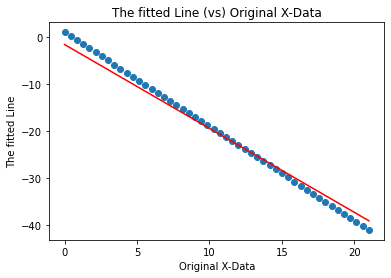

In [12]:
plt.scatter(x,y)
plt.plot(x,predicted[-1] , color ="red")
plt.xlabel("Original X-Data")
plt.ylabel("The fitted Line")
plt.title("The fitted Line (vs) Original X-Data")
plt.show()

## RMSProp

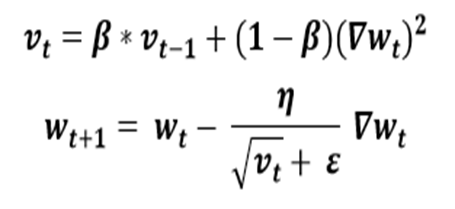

In [13]:
def rms_prop(X,Y,learn_rate,max_iter,beta):
    theta_0 , theta_1 , v_t_0 , v_t_1 = 0 , 0 , 0 , 0
    E = 1e-8
    cost_list = []
    theta_0_list = []
    theta_1_list = []
    predicted=[]
    counter = 0
    
    for i in range(max_iter): 
        
        # calculate h(theta)
        predicted_Y = theta_0 + theta_1 * X
        predicted.append(predicted_Y)
        
        
        # calculate cost function
        cost_fun = sum((predicted_Y - Y)**2) / (2*len(Y))
        cost_list.append(cost_fun)
        
        
        # calculate gradient
        grad_0 = sum(predicted_Y - Y) / len(Y)
        grad_1 = sum((predicted_Y - Y)* X) / len(Y) 
        grad = np.array([grad_0,grad_1])
        
        
        # calculate v_t
        v_t_0 = (beta * v_t_0) + (1 - beta ) * (grad_0 ** 2)
        v_t_1 = (beta * v_t_1) + (1 - beta ) * (grad_1 ** 2)
        
        
        # update thetas
        theta_0 = theta_0 - ((learn_rate / ((np.sqrt(v_t_0)) + E)) * grad_0)
        theta_1 = theta_1 - ((learn_rate / ((np.sqrt(v_t_1)) + E)) * grad_1)   
        theta_0_list.append(theta_0)
        theta_1_list.append(theta_1)
        counter += 1
        
        
        if len(cost_list) > 1 :
            if norm(grad) < 0.0001:
                break
            elif np.absolute(cost_list[i] - cost_list[i-1]) < 0.0001 :
                break
            elif np.absolute(norm([theta_0_list[i],theta_1_list[i]]) - norm([theta_0_list[i-1],theta_1_list[i-1]])) < 0.0001 :
                break
    return theta_0_list , theta_1_list , cost_list , predicted , theta_0_list[-1] , theta_1_list[-1] , counter

In [14]:
theta_0_list , theta_1_list , cost_list , predicted , optim_theta_0 , optim_theta_1 , counter = rms_prop(x,y,0.01,1000,0.7)
hypo = optim_theta_0 + optim_theta_1 * x
print(hypo)

[ 8.85203976e-01  2.93364301e-02 -8.26531116e-01 -1.68239866e+00
 -2.53826621e+00 -3.39413375e+00 -4.25000130e+00 -5.10586885e+00
 -5.96173639e+00 -6.81760394e+00 -7.67347148e+00 -8.52933903e+00
 -9.38520658e+00 -1.02410741e+01 -1.10969417e+01 -1.19528092e+01
 -1.28086768e+01 -1.36645443e+01 -1.45204119e+01 -1.53762794e+01
 -1.62321469e+01 -1.70880145e+01 -1.79438820e+01 -1.87997496e+01
 -1.96556171e+01 -2.05114847e+01 -2.13673522e+01 -2.22232198e+01
 -2.30790873e+01 -2.39349549e+01 -2.47908224e+01 -2.56466900e+01
 -2.65025575e+01 -2.73584250e+01 -2.82142926e+01 -2.90701601e+01
 -2.99260277e+01 -3.07818952e+01 -3.16377628e+01 -3.24936303e+01
 -3.33494979e+01 -3.42053654e+01 -3.50612330e+01 -3.59171005e+01
 -3.67729681e+01 -3.76288356e+01 -3.84847031e+01 -3.93405707e+01
 -4.01964382e+01 -4.10523058e+01]


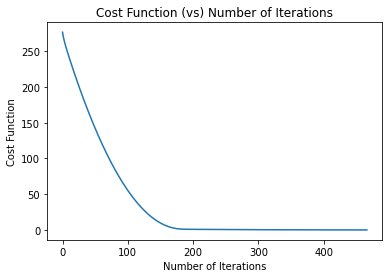

In [15]:
max_iter = list(range(counter))
plt.plot(max_iter,cost_list)
plt.xlabel("Number of Iterations")
plt.ylabel("Cost Function")
plt.title("Cost Function (vs) Number of Iterations")
plt.show()

In [16]:
print(counter)

467


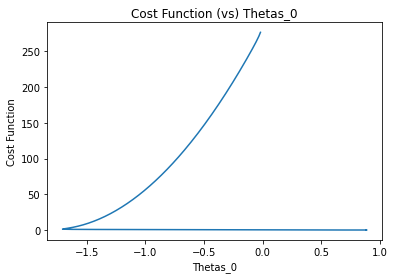

In [17]:
plt.plot(theta_0_list,cost_list)
plt.xlabel("Thetas_0")
plt.ylabel("Cost Function")
plt.title("Cost Function (vs) Thetas_0")
plt.show()

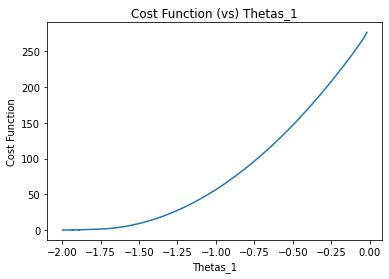

In [18]:
plt.plot(theta_1_list,cost_list)
plt.xlabel("Thetas_1")
plt.ylabel("Cost Function")
plt.title("Cost Function (vs) Thetas_1")
plt.show()

## Adam

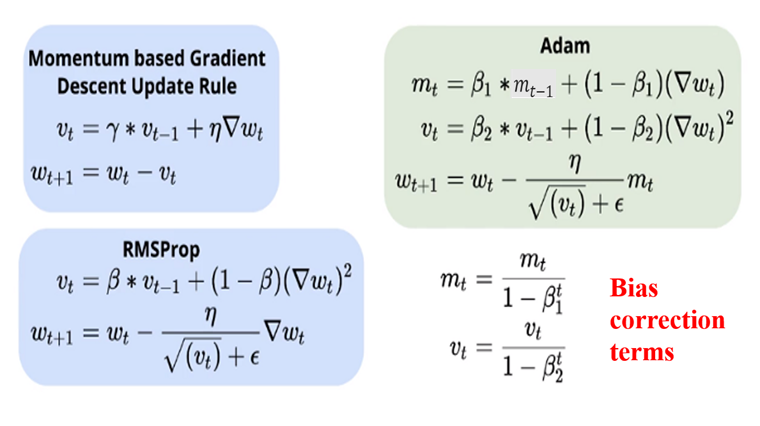

In [19]:
def adam(X,Y,learn_rate,max_iter,beta_1,beta_2):
    theta_0 , theta_1 , v_t_0 , v_t_1 , momentum_0 , momentum_1 = 0 , 0 , 0 , 0 , 0 , 0
    E = 10e-8
    cost_list = []
    theta_0_list = []
    theta_1_list = []
    predicted=[]
    counter = 0
    
    
    
    for i in range(max_iter): 
        # calculate h(theta)
        predicted_Y = theta_0 + theta_1 * X
        predicted.append(predicted_Y)
        
        
        
        # calculate cost function
        cost_fun = sum((predicted_Y - Y)**2) / (2*len(Y))
        cost_list.append(cost_fun)
        
        
        # calculate gradient
        grad_0 = sum(predicted_Y - Y) / len(Y)
        grad_1 = sum((predicted_Y - Y)* X) / len(Y) 
        grad = np.array([grad_0,grad_1])
        
        
        #calculate momentum 
        momentum_0 = (beta_1 * momentum_0) + (1 - beta_1) * (grad_0)
        momentum_1 = (beta_1 * momentum_1) + (1 - beta_1) * (grad_1)
        
        
        
        # calculate v_t
        v_t_0 = (beta_2 * v_t_0) + (1 - beta_2 ) * (grad_0 ** 2)
        v_t_1 = (beta_2 * v_t_1) + (1 - beta_2 ) * (grad_1 ** 2)
        
        
        # update thetas
        theta_0 = theta_0 - ((learn_rate / ((np.sqrt(v_t_0)) + E)) * momentum_0)
        theta_1 = theta_1 - ((learn_rate / ((np.sqrt(v_t_1)) + E)) * momentum_1)   
        theta_0_list.append(theta_0)
        theta_1_list.append(theta_1)
        counter += 1
        
        
        
        if len(cost_list) > 1 :
            if norm(grad) < 0.0001:
                break
            elif np.absolute(cost_list[i] - cost_list[i-1]) < 0.0001 :
                break
            elif np.absolute(norm([theta_0_list[i],theta_1_list[i]]) - norm([theta_0_list[i-1],theta_1_list[i-1]])) < 0.0001 :
                break
    return theta_0_list , theta_1_list , cost_list , predicted , theta_0_list[-1] , theta_1_list[-1] , counter

In [20]:
theta_0_list , theta_1_list , cost_list , predicted , optim_theta_0 , optim_theta_1 , counter = adam(x,y,0.01,300,0.9,0.99)
hypo = optim_theta_0 + optim_theta_1 * x
print(hypo)

[ -1.63909939  -2.40545676  -3.17181413  -3.93817149  -4.70452886
  -5.47088623  -6.2372436   -7.00360097  -7.76995834  -8.5363157
  -9.30267307 -10.06903044 -10.83538781 -11.60174518 -12.36810255
 -13.13445992 -13.90081728 -14.66717465 -15.43353202 -16.19988939
 -16.96624676 -17.73260413 -18.49896149 -19.26531886 -20.03167623
 -20.7980336  -21.56439097 -22.33074834 -23.09710571 -23.86346307
 -24.62982044 -25.39617781 -26.16253518 -26.92889255 -27.69524992
 -28.46160728 -29.22796465 -29.99432202 -30.76067939 -31.52703676
 -32.29339413 -33.0597515  -33.82610886 -34.59246623 -35.3588236
 -36.12518097 -36.89153834 -37.65789571 -38.42425307 -39.19061044]


In [21]:
print(counter)

242


In [22]:
r2_score(y,hypo)

0.987656848804867

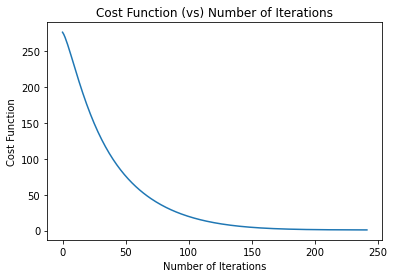

In [23]:
max_iter = list(range(counter))
plt.plot(max_iter,cost_list)
plt.xlabel("Number of Iterations")
plt.ylabel("Cost Function")
plt.title("Cost Function (vs) Number of Iterations")
plt.show()

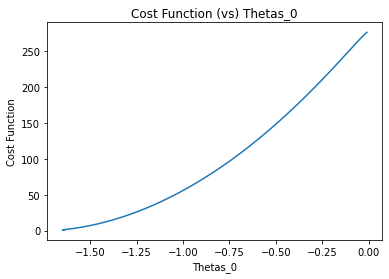

In [24]:
plt.plot(theta_0_list,cost_list)
plt.xlabel("Thetas_0")
plt.ylabel("Cost Function")
plt.title("Cost Function (vs) Thetas_0")
plt.show()

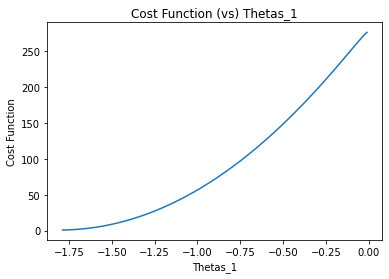

In [25]:
plt.plot(theta_1_list,cost_list)
plt.xlabel("Thetas_1")
plt.ylabel("Cost Function")
plt.title("Cost Function (vs) Thetas_1")
plt.show()

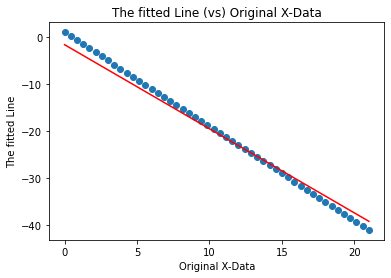

In [26]:
plt.scatter(x,y)
plt.plot(x,predicted[-1] , color ="red")
plt.xlabel("Original X-Data")
plt.ylabel("The fitted Line")
plt.title("The fitted Line (vs) Original X-Data")
plt.show()